# Arbol de Decisión Clasificación

## Paso 1: Importar librerías

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

##Librerías para test de normalidad
import statsmodels.api as sm
from scipy import stats
##Librerias para preprocesamiento
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
##Librerías para over y under sampling
from sklearn.utils import resample

## Paso 2: Funciones

In [2]:
# Función para importar data .xlsx o .csv
def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión diferente')

# Función informe sobre los datos NAN


def datos_NA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones : %d filas, %d columnas" %
              (df.shape[0], df.shape[1]))
        print("Total Valores NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" %
              ("Nombre Columna", "Tipo de Dato", "#Distintos", "Valores NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" %
                  (col_name[i], dtyp[i], uniq[i], na_val[i]))

    else:
        print("Se esperaba dataframe %15s" % (type(df)))

# Función para pintar algo el histograma reemplazamos con la media o mediana


def histoPlot(df, nomCol, anchoBar):
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

# Función para reemplazo de valore numéricos con la mediana


def imputacionNa(df, nomCol, param):
    if param == 'media':
        df[nomCol] = df[nomCol].fillna(df[nomCol].mean())
        return df[nomCol]
    else:
        df[nomCol] = df[nomCol].fillna(df[nomCol].median())
        return df[nomCol]
# Funcion para revisar datos categóricos o texto


def revCategoricos(df, nomCol):
    rev = df[nomCol].value_counts()
    return rev

# Función para datos categóricos modificaciones


def imputacionCat(df, nomCol, busqueda, reempl):
    df[nomCol] = np.where(df[nomCol] == busqueda, reempl, df[nomCol])
    return df[nomCol]

# Función para reeemplazo NA categóricos


def imputacionCatNa(df, nomCol):
    df[nomCol] = df[nomCol].fillna(df[nomCol].mode()[0])
    return df[nomCol]

# Función para cambiar datos de texto a numerico float64


def cambioTextNum(df, nomCol, tipo):
    df[nomCol] = df[nomCol].astype(tipo)
    return df[nomCol]

# Función modificar a 1 y 0 los datos categóricos


def camTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol] == busqueda, camuno, camdos)
    return df[nomCol]

# Función para variables dummies


def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data

# Función cambiar encabezados del dataframe


def camEncab(df, listaN):
    df.columns = listaN
    return df

# Función para el test de Shapiro - wilk - resistente al ruido en los datos


def testShapiroWilk(df):
    valoresP = []
    concepto = []
    variable = []
    for column in df:
        k2, p_value = stats.shapiro(df[column].values)
        valoresP.append(p_value)
        variable.append(column)
        if (p_value < 0.05):
            concepto.append('No es una variable Normal')
        else:
            concepto.append('Es una variable Normal')
    dfShapiro = pd.DataFrame(
        {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
    return dfShapiro

# Función para normalizar la data min - max sklearn


def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

## Función para Estandarizar la data formula z-score
def stanData(df):
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df)
    df_stan = pd.DataFrame(standardized_data, columns=df.columns)
    return df_stan

## Función para hacer la matriz de correlación de manera Tidy
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

##Función de label encoder
def Codificacion(df, nomCol):
    label_e = LabelEncoder()
    df[nomCol] = label_e.fit_transform(df[nomCol])
    return df[nomCol]


##Función para correlaciones
def grafCor(matriz):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    sns.heatmap(
        matriz,
        annot     = True,
        cbar      = True,
        annot_kws = {"size": 10},
        vmin      = -1,
        vmax      = 1,
        center    = 0,
        cmap      = sns.light_palette("#0d47a1"),
        square    = True,
        ax        = ax,
        linewidth=.5
    )

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )

    ax.tick_params(labelsize = 10)



## Paso 3: Llamado a Funciones

In [3]:
data = importDatos('./Datasets/', 'car_evaluation','.csv')

data.head()


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
data = camEncab(data, ['Vcompra', 'Mante', 'Puertas', 'CantPer', 'CapacBaul', 'Seguridad', 'Clase'])

data.head()

,Vcompra,Mante,Puertas,CantPer,CapacBaul,Seguridad,Clase
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
##Valores NAN
datos_NA(data)

Dimensiones : 1727 filas, 7 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                               Vcompra     object            4          0
                                 Mante     object            4          0
                               Puertas     object            4          0
                               CantPer     object            3          0
                             CapacBaul     object            3          0
                             Seguridad     object            3          0
                                 Clase     object            4          0


In [6]:
revCategoricos(data, 'Clase')

unacc    1209
acc       384
good       69
vgood      65
Name: Clase, dtype: int64

In [7]:
##Hacemos label encoder
#data['Clase'] = Codificacion(data,'Clase')
revCategoricos(data, 'Clase')

unacc    1209
acc       384
good       69
vgood      65
Name: Clase, dtype: int64

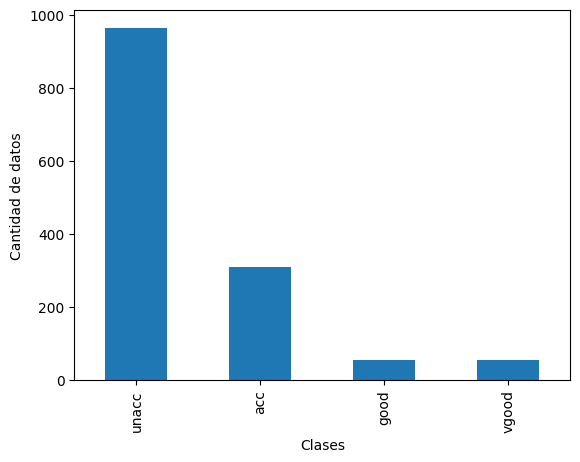

In [8]:
###!pip install -U imbalanced-learn
##Cambiar todo a numérico
features = []
for feature in data.columns:
    if feature != 'Clase':
        features.append(feature)
X = data[features]
y = data['Clase']

X.Vcompra = Codificacion(X, 'Vcompra')
X.Mante = Codificacion(X, 'Mante')
X.Puertas = Codificacion(X, 'Puertas')
X.CantPer = Codificacion(X, 'CantPer')
X.CapacBaul = Codificacion(X, 'CapacBaul')
X.Seguridad = Codificacion(X, 'Seguridad')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Clases')
plt.show()

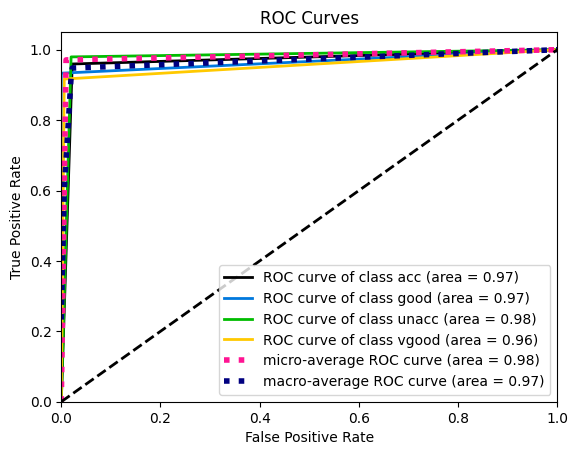

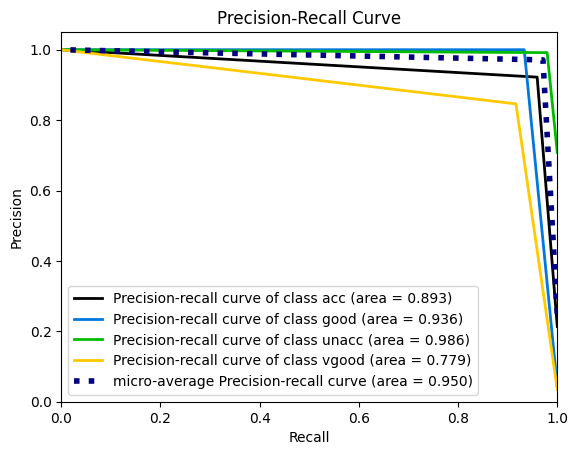

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [10]:
import numpy as np
n_samples = count.median().astype(np.int64)

def sampling_strategy(X,y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy

from imblearn.under_sampling import ClusterCentroids
under_sampler = ClusterCentroids(sampling_strategy=sampling_strategy(X_train,y_train,n_samples,t='majority'))
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, y_under,n_samples, t='minority'),k_neighbors=2)
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

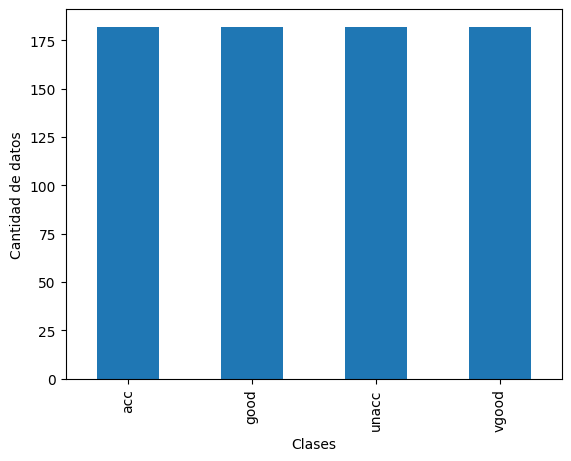

In [11]:
count = y_bal.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Clases')
plt.show()

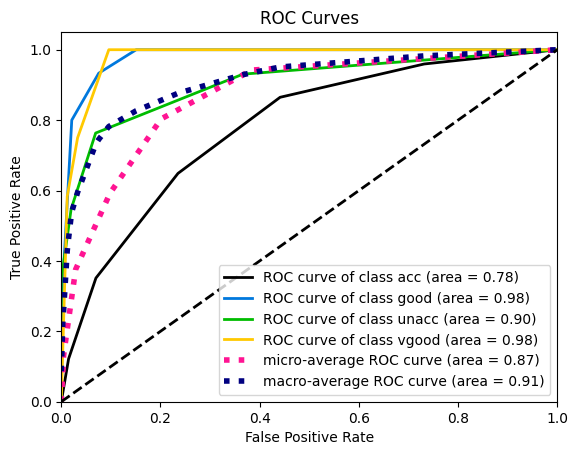

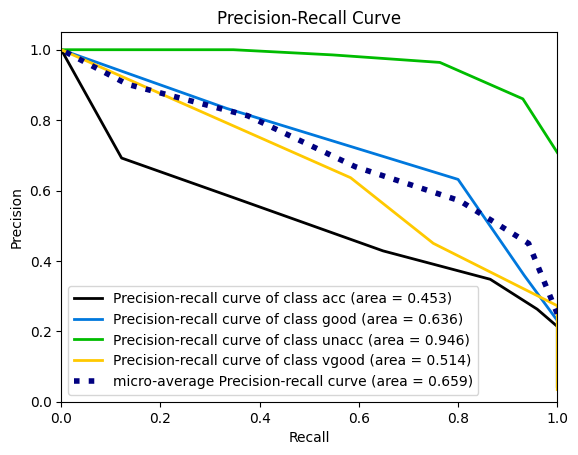

In [12]:
model = KNeighborsClassifier()
model.fit(X_bal, y_bal)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [13]:
testShapiroWilk(X)

,Variable,Valores P,Concepto
0,Vcompra,4.672917e-37,No es una variable Normal
1,Mante,4.672917e-37,No es una variable Normal
2,Puertas,4.672065e-37,No es una variable Normal
3,CantPer,2.548962e-42,No es una variable Normal
4,CapacBaul,2.554567e-42,No es una variable Normal
5,Seguridad,2.490107e-42,No es una variable Normal


In [14]:
corr_matrix = X.corr(method='pearson')

tidy_corr_matrix(corr_matrix)


,variable_1,variable_2,r,abs_r
1,Vcompra,Mante,-1.043357e-03,1.043357e-03
6,Mante,Vcompra,-1.043357e-03,1.043357e-03
8,Mante,Puertas,1.043357e-03,1.043357e-03
13,Puertas,Mante,1.043357e-03,1.043357e-03
12,Puertas,Vcompra,1.043357e-03,1.043357e-03
2,Vcompra,Puertas,1.043357e-03,1.043357e-03
4,Vcompra,CapacBaul,-9.523677e-04,9.523677e-04
24,CapacBaul,Vcompra,-9.523677e-04,9.523677e-04
25,CapacBaul,Mante,-9.523677e-04,9.523677e-04
10,Mante,CapacBaul,-9.523677e-04,9.523677e-04


Text(0.5, 1.0, 'Mapa de Correlación')

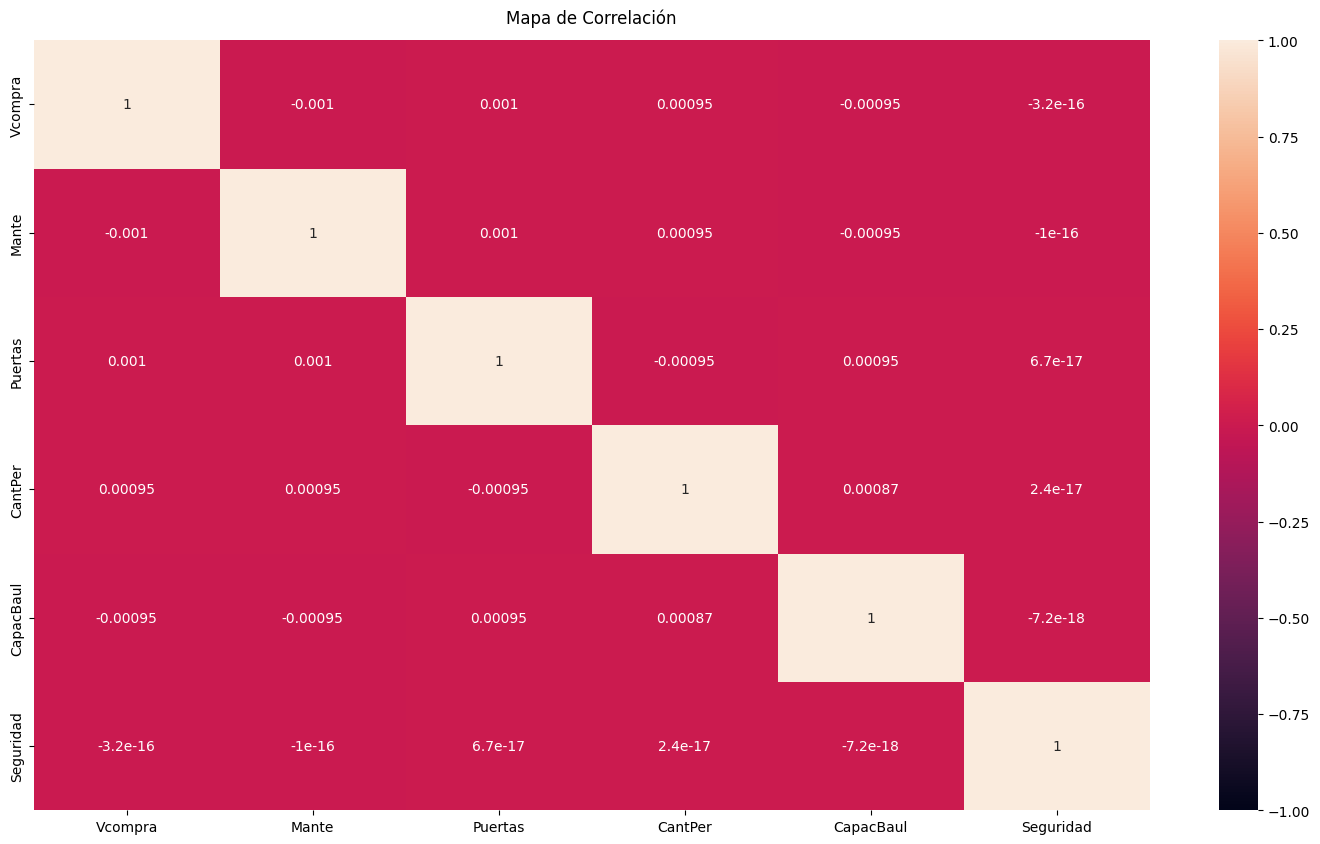

In [15]:
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [16]:
X_train.shape, X_test.shape

((1381, 6), (346, 6))

## Modelo con Gini

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
clf_gini.fit(X_bal, y_bal)
y_pred_gini = clf_gini.predict(X_test)
print('Eficiencia del modelo con gini: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Eficiencia del modelo con gini: 0.9162


In [30]:
y_pred_train_gini = clf_gini.predict(X_bal)

y_pred_train_gini

print('Eficiencia con el set de train: {0:0.4f}'. format(accuracy_score(y_bal, y_pred_train_gini)))

Eficiencia con el set de train: 0.9835


In [31]:
##Chequear overfitting y under fitting
print('Training set score: {:.4f}'.format(clf_gini.score(X_bal, y_bal)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9835
Test set score: 0.9162


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_bal, y_pred_train_gini))


              precision    recall  f1-score   support

         acc       0.99      0.95      0.97       182
        good       0.96      1.00      0.98       182
       unacc       0.99      0.98      0.99       182
       vgood       0.99      1.00      1.00       182

    accuracy                           0.98       728
   macro avg       0.98      0.98      0.98       728
weighted avg       0.98      0.98      0.98       728



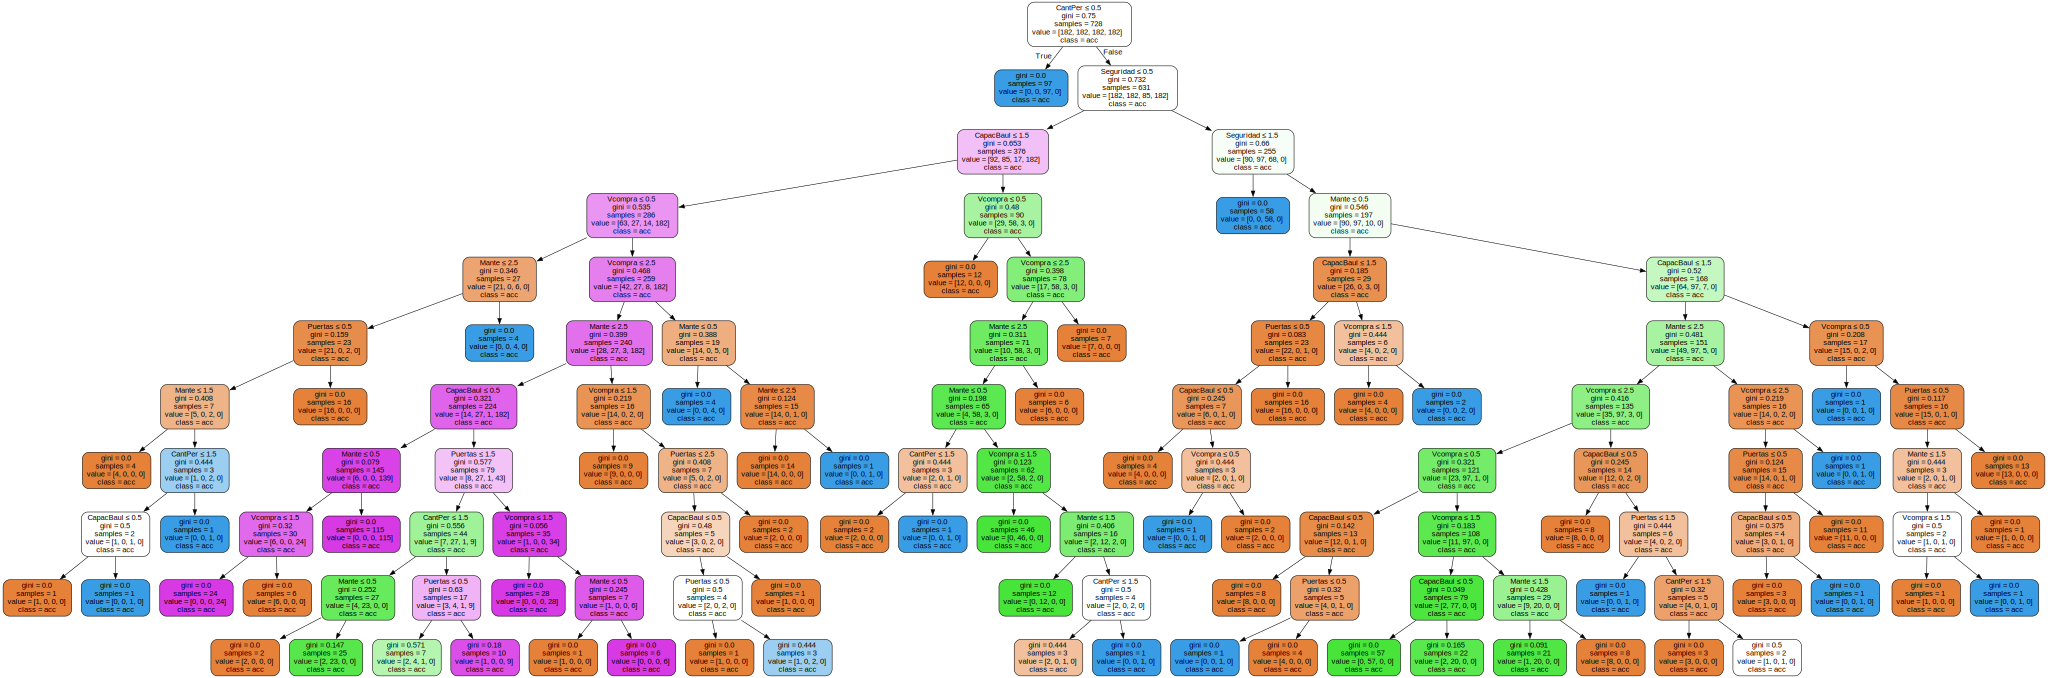

In [33]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_bal.columns,  
                              class_names=y_bal,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

## Modelo con Entropy

In [38]:
clf_gini_e = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
clf_gini_e.fit(X_bal, y_bal)
y_pred_gini_e = clf_gini_e.predict(X_test)
print('Eficiencia del modelo con gini: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini_e)))

Eficiencia del modelo con gini: 0.9017


In [39]:
y_pred_train_gini_e = clf_gini_e.predict(X_bal)

y_pred_train_gini_e

print('Eficiencia con el set de train: {0:0.4f}'. format(accuracy_score(y_bal, y_pred_train_gini_e)))

Eficiencia con el set de train: 0.9849


In [40]:
##Chequear overfitting y under fitting
print('Training set score: {:.4f}'.format(clf_gini_e.score(X_bal, y_bal)))

print('Test set score: {:.4f}'.format(clf_gini_e.score(X_test, y_test)))

Training set score: 0.9849
Test set score: 0.9017


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_bal, y_pred_train_gini_e))

              precision    recall  f1-score   support

         acc       0.96      0.98      0.97       182
        good       0.98      0.98      0.98       182
       unacc       1.00      0.98      0.99       182
       vgood       1.00      0.99      1.00       182

    accuracy                           0.98       728
   macro avg       0.99      0.98      0.98       728
weighted avg       0.99      0.98      0.98       728

